In [2]:
data <- read.csv('insurance.csv', header=TRUE)

In [3]:
library(tidyverse)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [12]:
data <- transform(data, sex = as.factor(sex), 
              children = as.factor(children), 
              smoker = as.factor(smoker),
                region = as.factor(region))

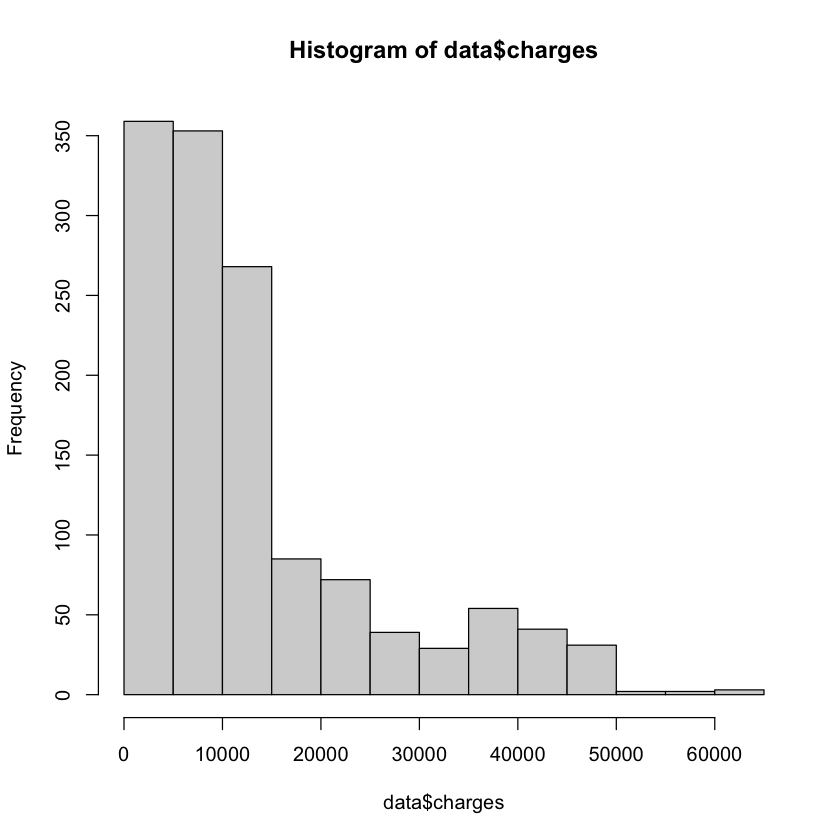

In [13]:
hist(data$charges)

In [14]:
data = mutate(data, norm_charges = log(charges))

In [15]:
data

age,sex,bmi,children,smoker,region,charges,norm_charges
<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
19,female,27.900,0,yes,southwest,16884.924,9.734176
18,male,33.770,1,no,southeast,1725.552,7.453302
28,male,33.000,3,no,southeast,4449.462,8.400538
33,male,22.705,0,no,northwest,21984.471,9.998092
32,male,28.880,0,no,northwest,3866.855,8.260197
31,female,25.740,0,no,southeast,3756.622,8.231275
46,female,33.440,1,no,southeast,8240.590,9.016827
37,female,27.740,3,no,northwest,7281.506,8.893093
37,male,29.830,2,no,northeast,6406.411,8.765054


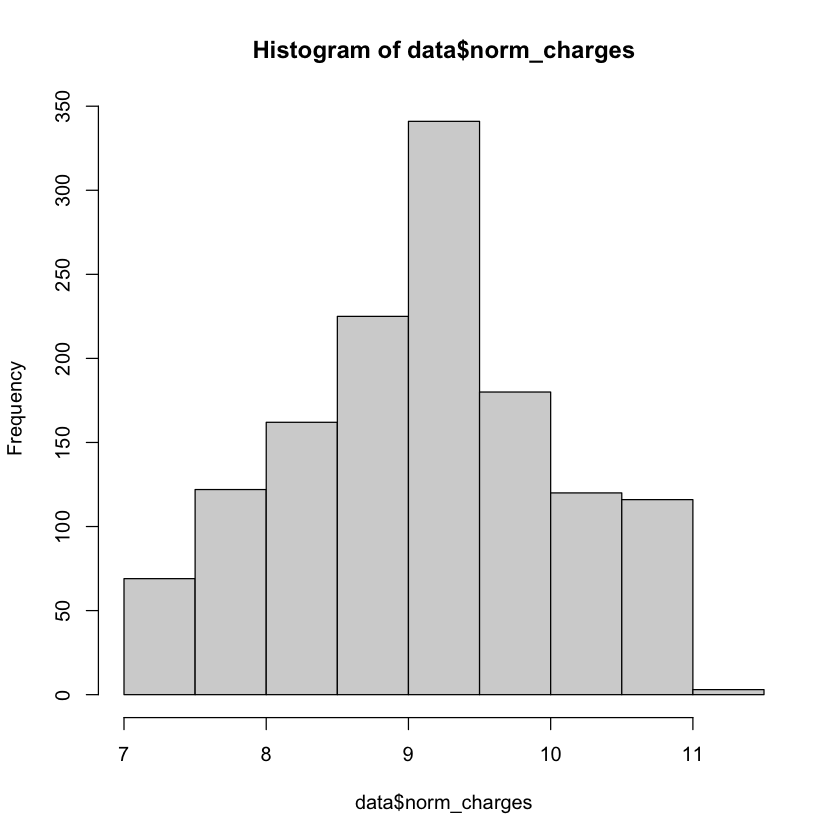

In [16]:
hist(data$norm_charges)

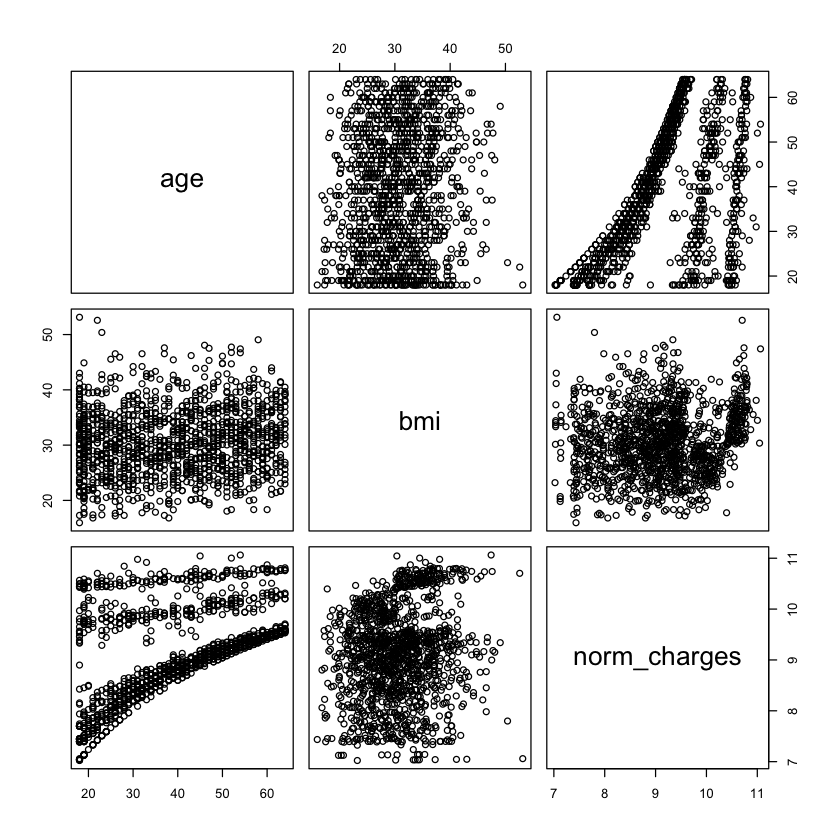

In [17]:
quant_data <- subset(data, select = c(age, bmi, norm_charges))
pairs(quant_data)

In [18]:
library(ggplot2)

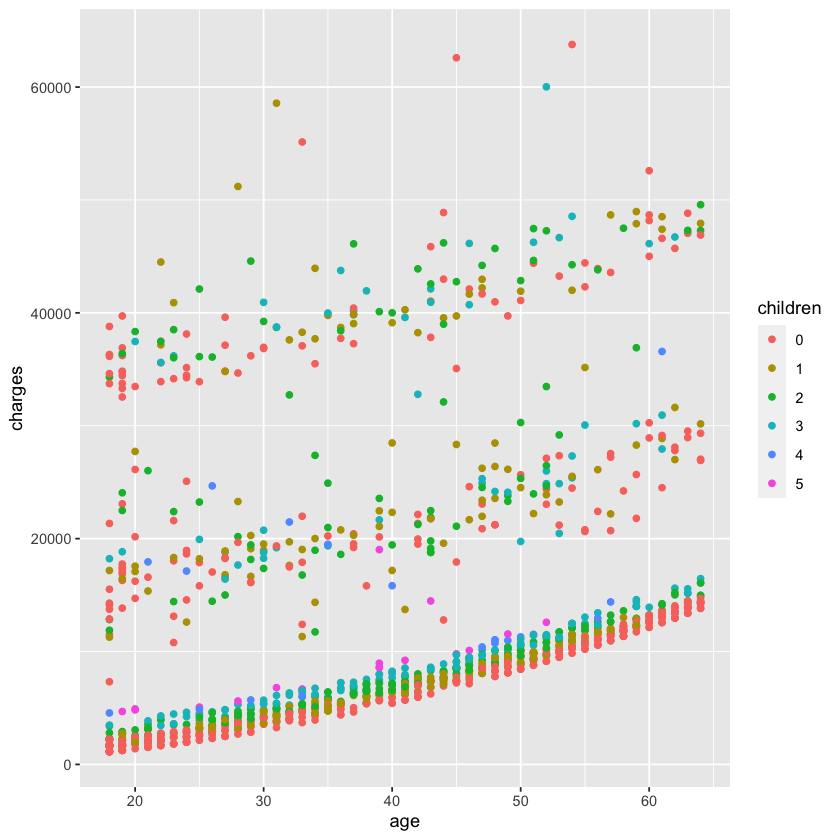

In [19]:
ggplot(data, aes(age, charges, col = children))+geom_point()

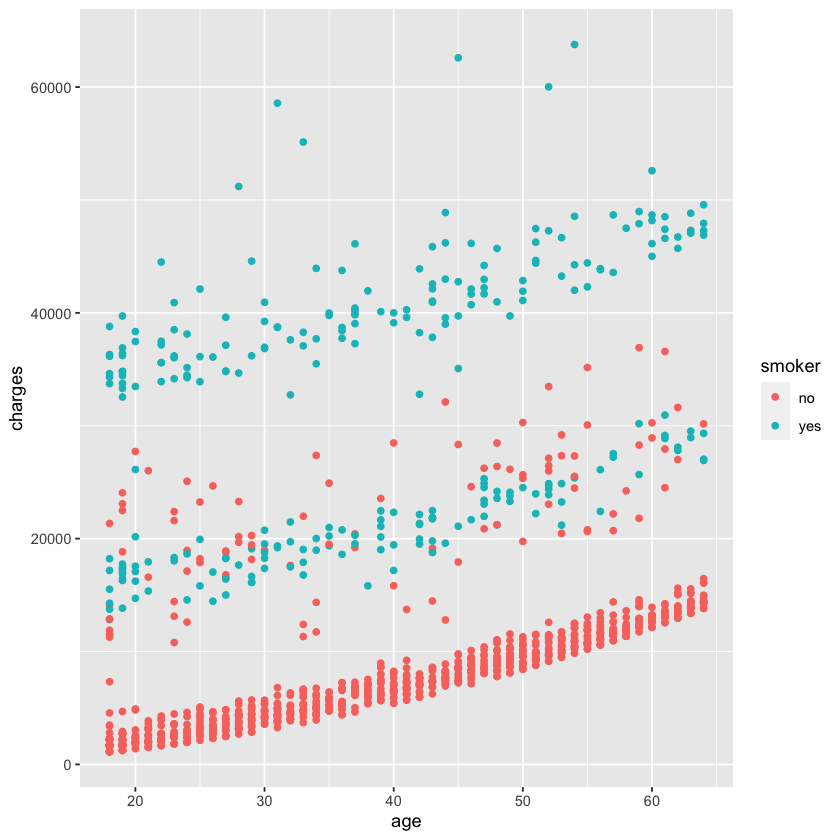

In [20]:
ggplot(data, aes(age, charges, col = smoker))+geom_point()

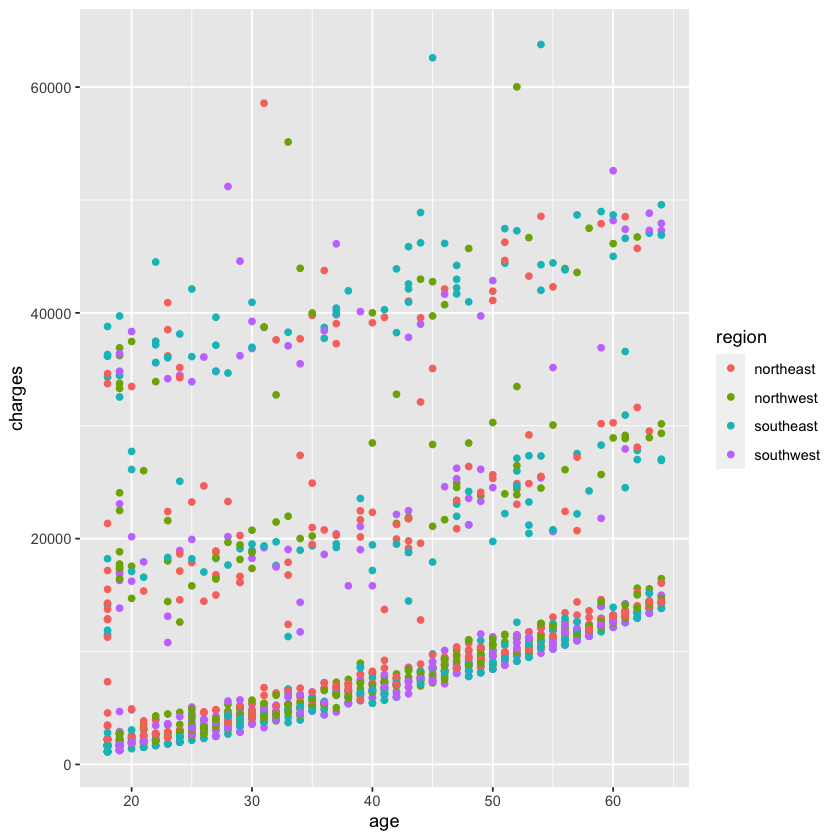

In [21]:
ggplot(data, aes(age, charges, col = region))+geom_point()

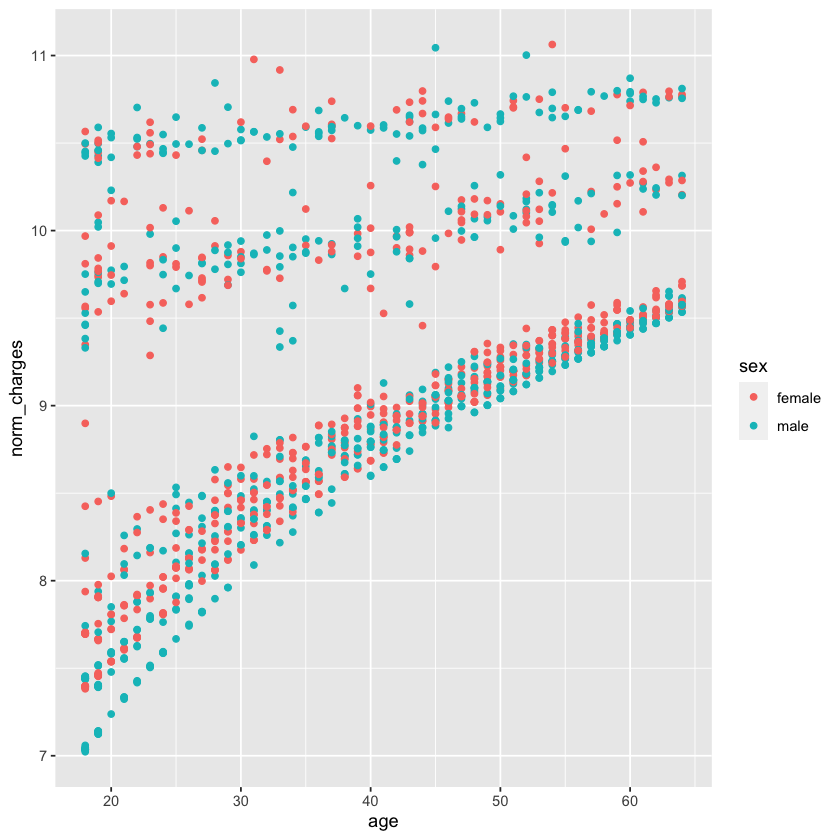

In [83]:
ggplot(data, aes(age, norm_charges, col = sex))+geom_point()

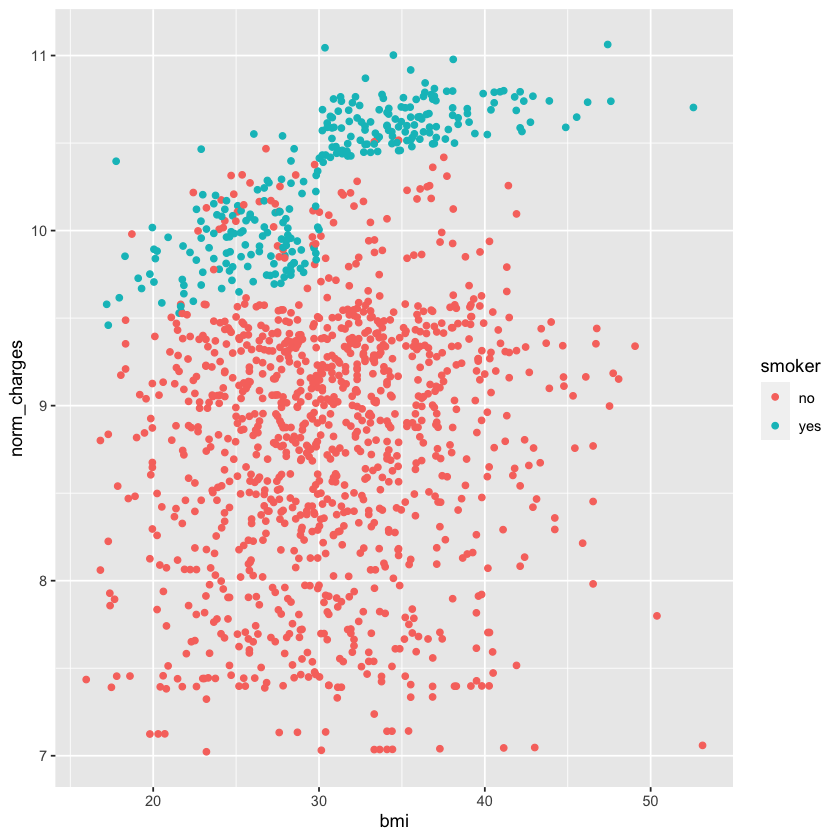

In [96]:
ggplot(data, aes(bmi, norm_charges, col = smoker))+geom_point()

In [23]:
data

age,sex,bmi,children,smoker,region,charges,norm_charges
<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
19,female,27.900,0,yes,southwest,16884.924,9.734176
18,male,33.770,1,no,southeast,1725.552,7.453302
28,male,33.000,3,no,southeast,4449.462,8.400538
33,male,22.705,0,no,northwest,21984.471,9.998092
32,male,28.880,0,no,northwest,3866.855,8.260197
31,female,25.740,0,no,southeast,3756.622,8.231275
46,female,33.440,1,no,southeast,8240.590,9.016827
37,female,27.740,3,no,northwest,7281.506,8.893093
37,male,29.830,2,no,northeast,6406.411,8.765054


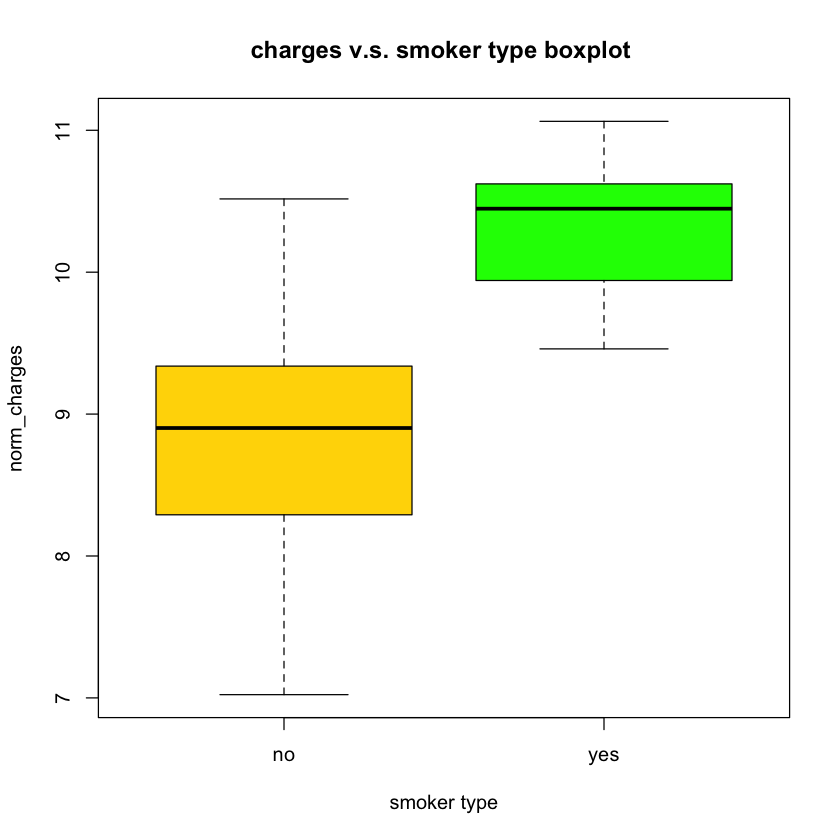

In [52]:
boxplot(norm_charges~smoker, data=data, notch=FALSE,
  col=(c("gold","green")),
  main="charges v.s. smoker type boxplot ", xlab="smoker type")

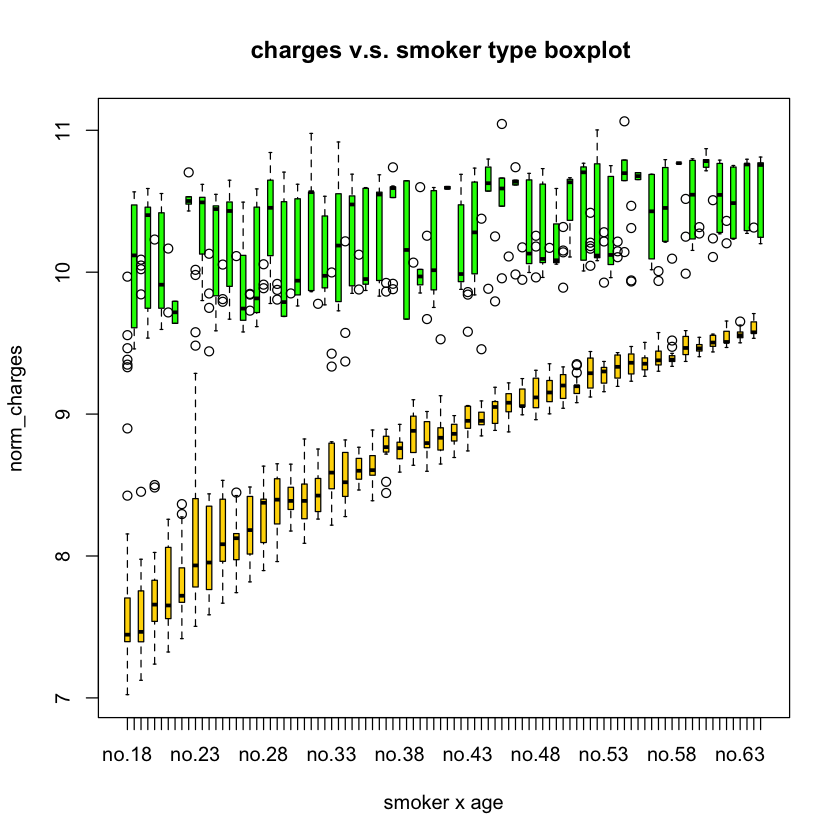

In [66]:
boxplot(norm_charges~smoker*age, data=data, notch=FALSE,
  col=(c("gold","green")),
  main="charges v.s. smoker type boxplot ", xlab="smoker x age")

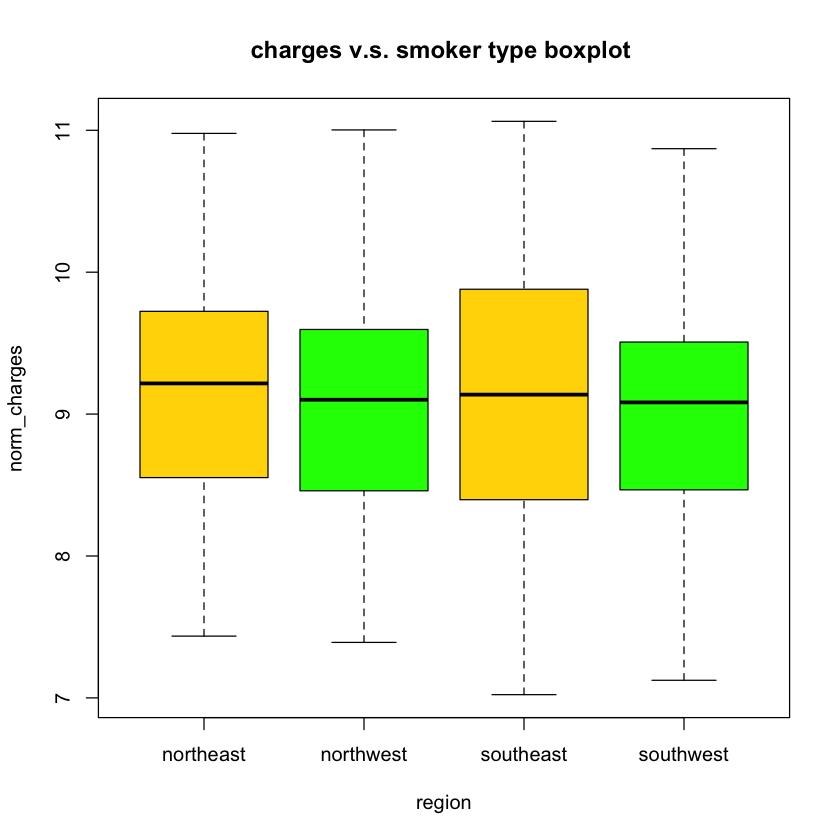

In [49]:
boxplot(norm_charges~region, data=data, notch=FALSE,
  col=(c("gold","green")),
  main="charges v.s. smoker type boxplot ", xlab="region")

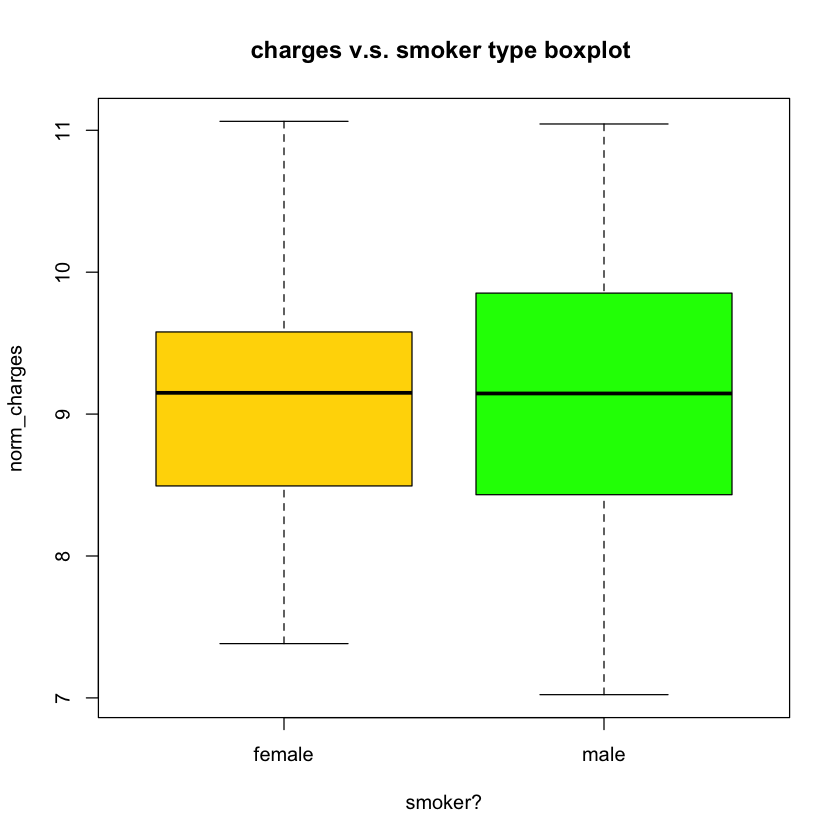

In [51]:
boxplot(norm_charges~sex, data=data, notch=FALSE,
  col=(c("gold","green")),
  main="charges v.s. smoker type boxplot ", xlab="smoker?")

In [105]:
library(leaps)
s <- regsubsets(norm_charges~.+age*smoker+bmi*smoker, data=subset(data, select = -c(charges)), method="exhaustive", nvmax = 14)

In [106]:
s.sum <- summary(s)

In [110]:
matrix_sum_df <- data.frame(
    num_param = c(1:14),
    Adj.R2 = s.sum$adjr2,
    CP = s.sum$cp,
    BIC = s.sum$bic)

In [111]:
matrix_sum_df

num_param,Adj.R2,CP,BIC
<int>,<dbl>,<dbl>,<dbl>
1,0.4660640,2748.90117,-826.1705
2,0.7582209,515.45184,-1880.0063
3,0.7857887,305.57868,-2035.7900
4,0.7987971,207.10322,-2113.4190
5,0.8047166,162.82224,-2147.1792
6,0.8086628,133.64093,-2168.3004
7,0.8128207,102.89447,-2191.5030
8,0.8162755,77.54292,-2210.2373
9,0.8193133,55.40121,-2226.3535


In [112]:
s.sum

Subset selection object
Call: regsubsets.formula(norm_charges ~ . + age * smoker + bmi * smoker, 
    data = subset(data, select = -c(charges)), method = "exhaustive", 
    nvmax = 14)
14 Variables  (and intercept)
                Forced in Forced out
age                 FALSE      FALSE
sexmale             FALSE      FALSE
bmi                 FALSE      FALSE
children1           FALSE      FALSE
children2           FALSE      FALSE
children3           FALSE      FALSE
children4           FALSE      FALSE
children5           FALSE      FALSE
smokeryes           FALSE      FALSE
regionnorthwest     FALSE      FALSE
regionsoutheast     FALSE      FALSE
regionsouthwest     FALSE      FALSE
age:smokeryes       FALSE      FALSE
bmi:smokeryes       FALSE      FALSE
1 subsets of each size up to 14
Selection Algorithm: exhaustive
          age sexmale bmi children1 children2 children3 children4 children5
1  ( 1 )  " " " "     " " " "       " "       " "       " "       " "      
2  ( 1 )  "*" 

In [114]:
optimal_lm <- lm(norm_charges~age+sex+children+smoker+region+age*smoker+bmi*smoker, data=data)

In [115]:
summary(optimal_lm)


Call:
lm(formula = norm_charges ~ age + sex + children + smoker + region + 
    age * smoker + bmi * smoker, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63156 -0.15422 -0.07901  0.00876  2.34424 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.1135940  0.0700449 101.558  < 2e-16 ***
age              0.0416369  0.0008468  49.171  < 2e-16 ***
sexmale         -0.0859366  0.0211416  -4.065 5.09e-05 ***
children1        0.1570146  0.0267389   5.872 5.43e-09 ***
children2        0.2900452  0.0296136   9.794  < 2e-16 ***
children3        0.2568288  0.0347744   7.386 2.68e-13 ***
children4        0.5107771  0.0786310   6.496 1.17e-10 ***
children5        0.4901884  0.0924123   5.304 1.32e-07 ***
smokeryes        1.2898902  0.1452394   8.881  < 2e-16 ***
regionnorthwest -0.0665231  0.0302401  -2.200    0.028 *  
regionsoutheast -0.1479378  0.0304143  -4.864 1.29e-06 ***
regionsouthwest -0.1519882  0.0303533  -5.007 6.26